# Logistic regression

- Newton's model

In [322]:
import numpy as np

raw_X = np.loadtxt('data/logistic_x.txt') # m x n
raw_y = np.loadtxt('data/logistic_y.txt') # 1 x m

y = np.array([1 if v == 1 else 0 for v in raw_y])

x_0 = np.ones(raw_X.shape[0]).reshape(-1, 1) # (m,) => (m, 1)
X = np.concatenate((x_0, raw_X), axis=1) # m, n+1

theta = np.zeros(X.shape[1])

print(X[:5])
print(y)
print(theta)

%config InlineBackend.figure_format = 'retina'

[[ 1.          1.3432504  -1.3311479 ]
 [ 1.          1.8205529  -0.6346681 ]
 [ 1.          0.98632067 -1.8885762 ]
 [ 1.          1.9443734  -1.635452  ]
 [ 1.          0.97673352 -1.3533151 ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0. 0. 0.]


## Newton's method

Update rule: $\theta := \theta - H^{-1} \nabla_{\theta} l(\theta)$

Partial derivative vector and Hessian:
$$
\begin{aligned}
\nabla_{\theta} \ell (\theta)_{j} &= \sum_{i = 1}^m (y^{(i)} - h_{\theta}(x^{(i)}))x_j^{(i)} \\
\\
H_{kj} &= \frac{\partial^2 \ell(\theta)}{\partial \theta_k \partial \theta_j} \\
&= \sum_{i = 1}^m x_j^{(i)} x_k^{(i)} g(\theta^T x^{(i)}) (1 - g(\theta^T x^{(i)}))
\end{aligned}
$$

In [323]:
def sigmoid(z):
    '''vectorized sigmoid'''
    return 1 / (1 + np.exp(-z))

def hypothesis(theta, X):
    '''vectorized hypothesis, X = design matrix'''
    return sigmoid(X @ theta) # result is length m vector

def partials(theta, X, y):
    '''vectorized partial derivative'''
    h = hypothesis(theta, X)
    residuals = (y - h)
    # jth index of this vector = sum over all training: res * jth feature
    return residuals @ X # result is length n vector

def hessian(theta, X, y):
    prod = hypothesis(theta, X) * (1 - hypothesis(theta, X)) # m-vector
    D = np.diag(prod) # construct diagonal matrix of sigmoid products
    return -X.T @ D @ X # error: was missing the - sign!! spent so long on this

# this cost only works for for y = {-1, 1}
# def cost(theta, X, y):
#     m = X.shape[0]
#     return np.sum(np.log(1 + np.exp( (-y - (X @ theta) ))) / m

def likelihood(theta, X, y):
    class_1 = y @ np.log(hypothesis(theta, X))
    class_0 = (1 - y) @ np.log(1 - hypothesis(theta, X))
    
    return np.sum(class_1 + class_0)
    

In [324]:
print(partials(theta, X, y))
print(hessian(theta, X, y))
print(hypothesis(theta, X))

[-0.5        47.66904753 54.92823194]
[[ -24.75        -97.10155981    8.65500126]
 [ -97.10155981 -472.21469823   17.98935367]
 [   8.65500126   17.98935367  -79.93290546]]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


In [325]:
def newton(theta, X, y, threshold = 0.001, max_iter = 15):

    history = []
    delta = np.Inf
    
    while delta >= threshold and len(history) <= max_iter:
        args = (theta, X, y)
        theta -= np.linalg.pinv(hessian(*args)) @ partials(*args)
        like = likelihood(*args)
        delta = like - history[-1] if len(history) >= 1 else np.Inf
        history.append(like)

    return theta, history

In [326]:
theta = np.zeros(X.shape[1])
theta, history = newton(theta, X, y)
print(theta)

[-2.62050954  0.76037096  1.17194549]


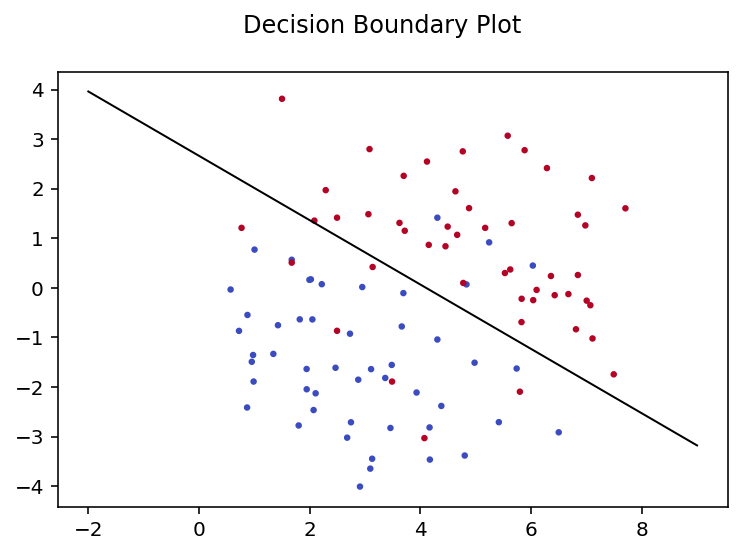

In [327]:
import matplotlib.pyplot as plt

line_x1 = np.arange(-2, 10, 1)
line_x2 = [(0.5 - theta[0] - (theta[1] * i)) / theta[2] for i in line_x1]

fig, ax = plt.subplots()
ax.scatter(X[:,1], X[:,2], s=5, c=y, cmap="coolwarm")
ax.plot(line_x1, line_x2, linewidth=1, c='black')
fig.suptitle('Decision Boundary Plot')
plt.show()